# ACADEMIC INTERGITY STATEMENT
"I certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I (we) did not receive 
any external help, coaching or contributions during the production of this work."

# Part I: Building a Basic NN

In [1]:
import statistics as st
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# step 3 read csv file
incomeD = pd.read_table('income_dataset.csv',sep=',')

In [3]:
# step 4 main statistics with pandas
print(incomeD.describe)
print(incomeD.head)
print(incomeD.index)
print(incomeD.columns)
print(incomeD.dtypes)
print(incomeD.size)
print(incomeD.shape)

print("\nMAX\n")
print(incomeD.max(axis = 0))
print("\nmin\n")
print(incomeD.min(axis = 0))
# print("\nmedian\n")
# print(incomeD.median(axis = 0))
# print("\nmean\n")
# print(incomeD.mean(axis = 0))
# print("\nstdev\n")
# print(incomeD.std(axis = 0))

<bound method NDFrame.describe of        age workclass    fnlwgt     education  education.num  \
0       90         ?   77053.0       HS-grad              9   
1       82   Private  186061.0       HS-grad              9   
2       66         ?       NaN  Some-college             10   
3       54   Private  140359.0       7th-8th              4   
4       41   Private  264663.0  Some-college             10   
...    ...       ...       ...           ...            ...   
32556   22   Private  310152.0  Some-college             10   
32557   27   Private  257302.0    Assoc-acdm             12   
32558   40   Private  154374.0       HS-grad              9   
32559   58   Private  151910.0       HS-grad              9   
32560   22   Private  201490.0       HS-grad              9   

           marital.status         occupation   relationship  capital.gain  \
0                 Widowed                  ?  Not-in-family             0   
1                 Widowed    Exec-managerial  Not-in-fa

In [4]:
# step 5  data preprocessing
    # sum of missing entries
print(pd.isnull(incomeD).sum(axis=0))

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [5]:
    # drop the nan
incomeD = incomeD.dropna()
incomeD.drop(incomeD[incomeD['workclass'] == "?"].index, inplace = True)
incomeD.drop(incomeD[incomeD['occupation'] == "?"].index, inplace = True)
incomeD.drop(incomeD[incomeD['native.country'] == "?"].index, inplace = True)
print(incomeD)

       age workclass    fnlwgt     education  education.num  \
1       82   Private  186061.0       HS-grad              9   
3       54   Private  140359.0       7th-8th              4   
4       41   Private  264663.0  Some-college             10   
5       34   Private  216864.0       HS-grad              9   
6       38   Private  150601.0          10th              6   
...    ...       ...       ...           ...            ...   
32556   22   Private  310152.0  Some-college             10   
32557   27   Private  257302.0    Assoc-acdm             12   
32558   40   Private  154374.0       HS-grad              9   
32559   58   Private  151910.0       HS-grad              9   
32560   22   Private  201490.0       HS-grad              9   

           marital.status         occupation   relationship  capital.gain  \
1                 Widowed    Exec-managerial  Not-in-family             0   
3                Divorced  Machine-op-inspct      Unmarried             0   
4           

In [6]:
# string to category
dataD = incomeD
dataD['workclass'] = dataD.workclass.astype('category')
dataD['education'] = dataD.education.astype('category')
dataD['marital.status'] = dataD['marital.status'].astype('category')
dataD['occupation'] = dataD.occupation.astype('category')
dataD['native.country'] =dataD['native.country'].astype('category')
# incomeD['income'] = incomeD.income.astype('category')
dataD['relationship'] = dataD.relationship.astype(('category'))

# layer = tf.keras.layers.Hashing(num_bins=8)
# incomeD['workclass']=layer(incomeD['workclass'].tolist())
# layer = tf.keras.layers.Hashing(num_bins=16)
# incomeD['education']=layer(incomeD['education'].tolist())
# layer = tf.keras.layers.Hashing(num_bins=7)
# incomeD['marital.status']=layer(incomeD['marital.status'].tolist())
# layer = tf.keras.layers.Hashing(num_bins=15)
# incomeD['occupation']=layer(incomeD['occupation'].tolist())
# layer = tf.keras.layers.Hashing(num_bins=41)
# incomeD['native.country']=layer(incomeD['native.country'].tolist())
# layer = tf.keras.layers.Hashing(num_bins=7)
# incomeD['relationship']=layer(incomeD['relationship'].tolist())

dataD['workclass'] = pd.factorize(dataD['workclass'])[0] + 1
dataD['education'] = pd.factorize(dataD['education'])[0] + 1
dataD['marital.status'] = pd.factorize(dataD['marital.status'])[0] + 1
dataD['occupation'] = pd.factorize(dataD['occupation'])[0] + 1
dataD['native.country'] = pd.factorize(dataD['native.country'])[0] + 1
dataD['relationship'] = pd.factorize(dataD['relationship'])[0] + 1


dataD['income'] = dataD['income'].replace('<=50K', 0).replace('>50K', 1)


def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
dataD['workclass'] = NormalizeData(dataD['workclass'])
dataD['age'] = NormalizeData(dataD['age'])
dataD['fnlwgt'] = NormalizeData(dataD['fnlwgt'])
dataD['education'] = NormalizeData(dataD['education'] )
dataD['education.num'] = NormalizeData(dataD['education.num'])
dataD['marital.status'] = NormalizeData(dataD['marital.status'])
dataD['occupation'] = NormalizeData(dataD['occupation'])
dataD['relationship'] = NormalizeData(dataD['relationship'])
dataD['capital.gain'] = NormalizeData(dataD['capital.gain'])
dataD['capital.loss'] = NormalizeData(dataD['capital.loss'])
dataD['hours.per.week'] = NormalizeData(dataD['hours.per.week'])
dataD['native.country'] = NormalizeData(dataD['native.country'])

dataD

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,0.0,0.117131,0.000000,0.533333,0.000000,0.000000,0.0,0.0,1.000000,0.173469,0.0,0
3,0.506849,0.0,0.086061,0.066667,0.200000,0.166667,0.076923,0.2,0.0,0.895317,0.397959,0.0,0
4,0.328767,0.0,0.170568,0.133333,0.600000,0.333333,0.153846,0.4,0.0,0.895317,0.397959,0.0,0
5,0.232877,0.0,0.138072,0.000000,0.533333,0.166667,0.230769,0.2,0.0,0.865473,0.448980,0.0,0
6,0.287671,0.0,0.093024,0.200000,0.333333,0.333333,0.307692,0.2,0.0,0.865473,0.397959,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.0,0.201493,0.133333,0.600000,0.500000,0.769231,0.0,0.0,0.000000,0.397959,0.0,0
32557,0.136986,0.0,0.165563,0.800000,0.733333,0.666667,0.692308,1.0,0.0,0.000000,0.377551,0.0,0
32558,0.315068,0.0,0.095589,0.000000,0.533333,0.666667,0.076923,0.8,0.0,0.000000,0.397959,0.0,1
32559,0.561644,0.0,0.093914,0.000000,0.533333,0.000000,0.307692,0.2,0.0,0.000000,0.397959,0.0,0


In [7]:
# 80% training and 20% testing
sample80 = dataD.sample(frac=0.8,random_state=12345)
sample20 = dataD.drop(sample80.index)

X_train = sample80.iloc[:,:12]
Y_train = sample80.iloc[:,12:13]
X_test = sample20.iloc[:,:12]
Y_test = sample20.iloc[:,12:13]

X = dataD.iloc[:,:12]
Y = dataD.iloc[:,12:13]

print("X_train Y_train X_test Y_test")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train Y_train X_test Y_test
(24130, 12) (24130, 1) (6032, 12) (6032, 1)


In [8]:
# define the keras model
model = Sequential()
    # first hidden layer 60 nodes
model.add(Dense(60, input_dim=12, activation='sigmoid')) 
    # second hidden layer 10 nodes
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/20
2413/2413 [==============================] - 9s 3ms/step - loss: 0.4714 - accuracy: 0.7784 - val_loss: 0.3708 - val_accuracy: 0.8341
Epoch 2/20
2413/2413 [==============================] - 8s 3ms/step - loss: 0.3830 - accuracy: 0.8248 - val_loss: 0.3542 - val_accuracy: 0.8379
Epoch 3/20
2413/2413 [==============================] - 10s 4ms/step - loss: 0.3624 - accuracy: 0.8323 - val_loss: 0.3529 - val_accuracy: 0.8356
Epoch 4/20
2413/2413 [==============================] - 9s 4ms/step - loss: 0.3555 - accuracy: 0.8359 - val_loss: 0.3481 - val_accuracy: 0.8381
Epoch 5/20
2413/2413 [==============================] - 9s 4ms/step - loss: 0.3538 - accuracy: 0.8374 - val_loss: 0.3511 - val_accuracy: 0.8367
Epoch 6/20
2413/2413 [==============================] - 11s 4ms/step - loss: 0.3534 - accuracy: 0.8368 - val_loss: 0.3514 - val_accuracy: 0.8369
Epoch 7/20
2413/2413 [==============================] - 10s 4ms/step - loss: 0.3532 - accuracy: 0.8374 - val_loss: 0.3490 - val_accura

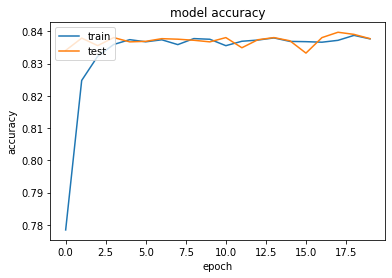

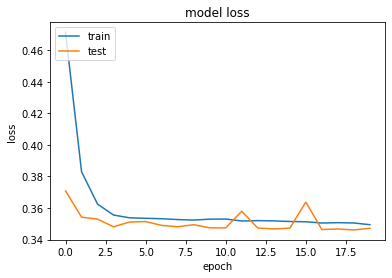

In [9]:
#loss
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, Y,validation_split=0.2, epochs=20, batch_size=10)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# visualization (graph)

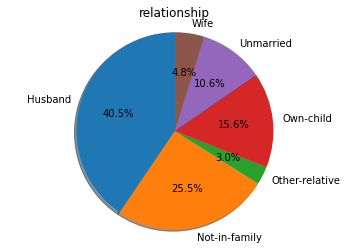

In [10]:
# 1 Pie chart (relationship)
GraphD = pd.read_table('income_dataset.csv',sep=',')
labels = 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'
size = [sum(GraphD['relationship']=='Husband'),\
        sum(GraphD['relationship']=='Not-in-family'),\
        sum(GraphD['relationship']=='Other-relative'),\
        sum(GraphD['relationship']=='Own-child'),\
        sum(GraphD['relationship']=='Unmarried'),\
        sum(GraphD['relationship']=='Wife')]
sizes = [x*100/ sum(size) for x in size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('relationship')
plt.show()

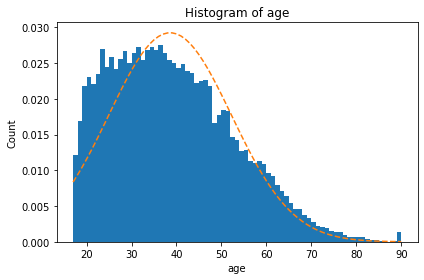

In [11]:
# hist
mu = st.mean(GraphD['age'])
sigma = st.stdev(GraphD['age']) 
x = GraphD['age']

num_bins = int((max(GraphD['age'])-min(GraphD['age'])))

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('age')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of age')

fig.tight_layout()
plt.show()

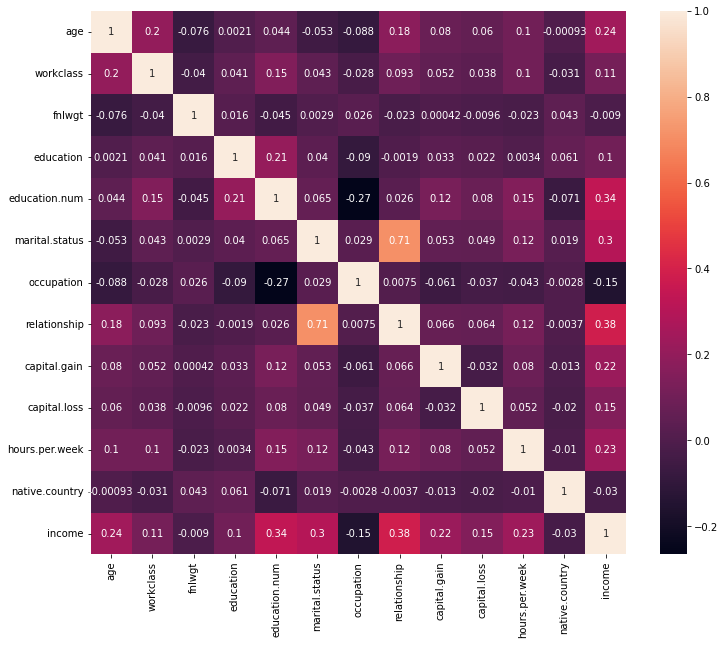

In [12]:
# heat map
correlation=dataD.corr()
# print(correlation)
plt.figure(figsize=(12,10))
sn.heatmap(correlation, annot=True)
plt.show()